# Problem Statement

About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.


# Data Collection

In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Uploading the dataset
data = pd.read_csv('loan_data_set.csv')
# Observing the dataset
data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
298,LP001955,Female,No,0,Graduate,No,5000,2541.0,151.0,480.0,1.0,Rural,N
541,LP002743,Female,No,0,Graduate,No,2138,0.0,99.0,360.0,0.0,Semiurban,N
448,LP002443,Male,Yes,2,Graduate,No,3340,1710.0,150.0,360.0,0.0,Rural,N
167,LP001578,Male,Yes,0,Graduate,No,2439,3333.0,129.0,360.0,1.0,Rural,Y
534,LP002731,Female,No,0,Not Graduate,Yes,18165,0.0,125.0,360.0,1.0,Urban,Y
429,LP002370,Male,No,0,Not Graduate,No,2717,0.0,60.0,180.0,1.0,Urban,Y
388,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136.0,360.0,1.0,Urban,Y
553,LP002788,Male,Yes,0,Not Graduate,No,2454,2333.0,181.0,360.0,0.0,Urban,N
337,LP002112,Male,Yes,2,Graduate,Yes,2500,4600.0,176.0,360.0,1.0,Rural,Y
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y


# Exploratory Data Analysis(EDA)

In [4]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Above code cell tells us that There are thirteen columns, four of them contains Float values, one of it have integer value and eight columns have categoricals values.



In [5]:
# Checking for Duplicate values
data.duplicated().sum()

0

In [6]:
# Describing the dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Checking how many unique values are there
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### Cleaning the dataset

In [8]:
# checking for NULL values
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Visualizing the dataset

<AxesSubplot:xlabel='LoanAmount'>

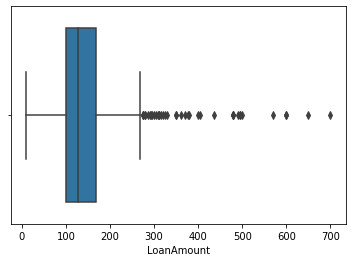

In [9]:
# To understand perticular column better we will use boxplot() from seaborn
sns.boxplot(x=data['LoanAmount'])

<AxesSubplot:>

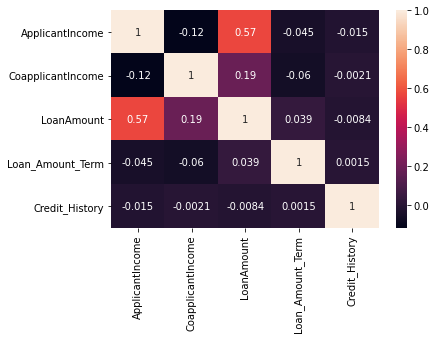

In [10]:
# Correlation Matrix
correlation = data.corr()
sns.heatmap(correlation, annot=True)

Correlation matrix is a tabel showing correlation coefficient between variables.

In [11]:
# Pairplot
# sns.pairplot(data)

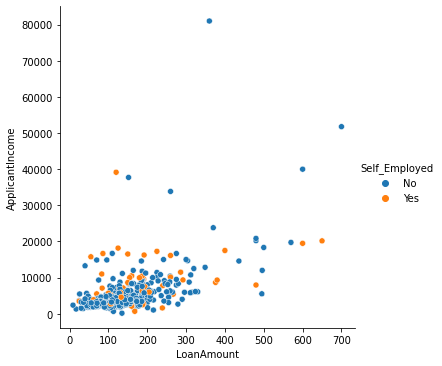

In [12]:
# Scatter plot
sns.relplot(x='LoanAmount', y='ApplicantIncome', hue='Self_Employed', data = data)

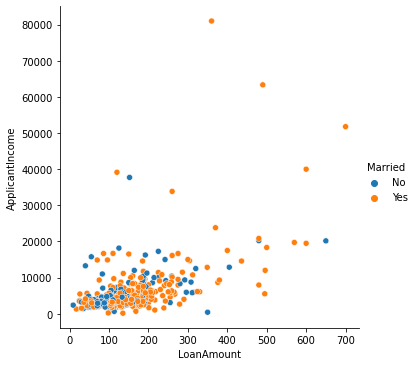

In [13]:

sns.relplot(x='LoanAmount', y='ApplicantIncome', hue='Married', data = data)

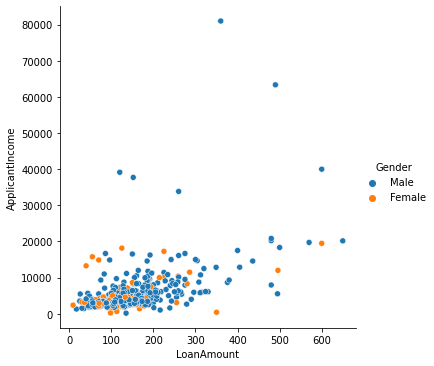

In [14]:

sns.relplot(x='LoanAmount', y='ApplicantIncome', hue='Gender', data = data)

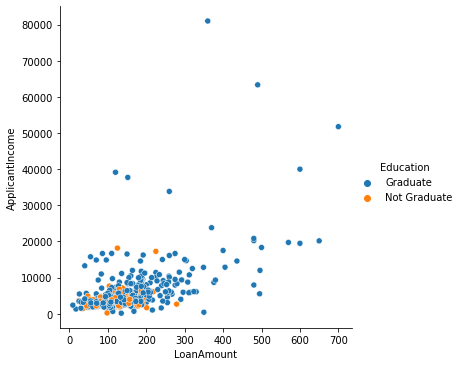

In [15]:

sns.relplot(x='LoanAmount', y='ApplicantIncome', hue='Education', data = data)

# Data Pre-processing

In [16]:
# Select the important Columns
features = ['Education', 'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Credit_History', 'Married', 'Gender']

In [17]:
# Loading features and then categorizing the variables
X = pd.get_dummies(data[features])
X

,ApplicantIncome,LoanAmount,Credit_History,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Married_No,Married_Yes,Gender_Female,Gender_Male
0,5849,NaN,1.0,1,0,1,0,1,0,0,1
1,4583,128.0,1.0,1,0,1,0,0,1,0,1
2,3000,66.0,1.0,1,0,0,1,0,1,0,1
3,2583,120.0,1.0,0,1,1,0,0,1,0,1
4,6000,141.0,1.0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,2900,71.0,1.0,1,0,1,0,1,0,1,0
610,4106,40.0,1.0,1,0,1,0,0,1,0,1
611,8072,253.0,1.0,1,0,1,0,0,1,0,1
612,7583,187.0,1.0,1,0,1,0,0,1,0,1


In [18]:
# Unique values of categorical variables are two so there are two columns for every categorical column.
# So we will drop one of the column.
X = X.drop(['Education_Not Graduate', 'Self_Employed_No', 'Married_No', 'Gender_Female'], axis = 1)
X

,ApplicantIncome,LoanAmount,Credit_History,Education_Graduate,Self_Employed_Yes,Married_Yes,Gender_Male
0,5849,NaN,1.0,1,0,0,1
1,4583,128.0,1.0,1,0,1,1
2,3000,66.0,1.0,1,1,1,1
3,2583,120.0,1.0,0,0,1,1
4,6000,141.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...
609,2900,71.0,1.0,1,0,0,0
610,4106,40.0,1.0,1,0,1,1
611,8072,253.0,1.0,1,0,1,1
612,7583,187.0,1.0,1,0,1,1


In [19]:
# Dependent variable
y = data.iloc[:, -1].values
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [20]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
X = si.fit_transform(X)

In [21]:
# Importing train_test_split library to split the dataset into train and test dataset
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
print('Size of train dataset', X_train.shape, y_train.shape)

Size of train dataset (491, 7) (491,)


In [24]:
print('Size of test dataset', X_test.shape, y_test.shape)

Size of test dataset (123, 7) (123,)


# Model Development and Evaluation

In [27]:
# importing sklearn libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [28]:
# Logistic regression
logistic = Pipeline([('logistic', LogisticRegression(random_state=0))])

In [29]:
# SVC
svc = Pipeline([('svc', SVC(kernel='linear', random_state = 0))])

In [30]:
# kernel
kernel = Pipeline([('kernel', SVC(kernel='rbf', random_state = 0))])

In [31]:
# naive
naive = Pipeline([('naive', GaussianNB())])

In [32]:
# knn
knn = Pipeline([('knn', KNeighborsClassifier(n_neighbors=20))])

In [33]:
# decision
decision = Pipeline([('decision', DecisionTreeClassifier(criterion='entropy', random_state=0))])

In [34]:
# random
random = Pipeline([('random', RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=0, ))])

In [35]:
# tree
tree = Pipeline([('tree', ExtraTreesClassifier(n_estimators=1000, criterion='entropy', random_state=0))])

In [36]:
# Creating list of pipeline
pipeline = [logistic, svc, kernel, naive, knn, decision, random, tree]

In [37]:
# fitting all the pipelines
for pipe in pipeline:
  pipe.fit(X_train, y_train)
  score = pipe.score(X_test, y_test)
  print(score)

0.8292682926829268
0.8292682926829268
0.7317073170731707
0.8292682926829268
0.6585365853658537
0.6747967479674797
0.7723577235772358
0.7398373983739838


In [ ]:
# using LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

In [248]:
# predicting the result
predict = lr.predict(X_test)

In [249]:
# import accuracy_score model so we can check the accuracy of the model
from sklearn.metrics import accuracy_score
# printing the accuracy
print("Accuracy score is: ", accuracy_score(predict, y_test))

Accuracy score is:  0.8292682926829268


In [40]:
# just for testing
X_pred = X_train[:5].copy()
lr.predict(X_pred)

array(['Y', 'Y', 'N', 'Y', 'Y'], dtype=object)

In [41]:
X_pred

array([[2.958e+03, 1.310e+02, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.125e+04, 1.960e+02, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.948e+03, 1.490e+02, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00],
       [3.813e+03, 1.160e+02, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.708e+03, 1.500e+02, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00]])

# Downloding the model

In [42]:
# to download the model
import pickle

In [43]:
# downloading the model
#with open('my_model', 'wb') as f:
    #pickle.dump(lr, f)

In [44]:
# loading the model
with open('my_model', 'rb') as f:
    model = pickle.load(f)

c:\Users\Hp\Desktop\Placement\flask_env\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [45]:
# checking the dataset on model
model.predict(X_pred)

array(['Y', 'Y', 'N', 'Y', 'Y'], dtype=object)